In [ ]:
'''
scores
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177678
https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

'''

In [2]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn import metrics
import joblib as joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [4]:
path = "/home/nacho/Documents/coronavirus/COVID-19_Paper/"
os.chdir(os.path.join(path)) 

In [7]:
try:
    gridprueba = joblib.load('models/all_data/20_80/df_caso5_1_grid.pkl')
except:
    print(sys.exc_info()[0])


In [8]:
grid = joblib.load('models/all_data/20_80/df_caso_7_2_grid.pkl')
grid_report = pd.read_csv("models/all_data/20_80/df_caso_7_2_grid_report.csv", index_col=0)

In [9]:
grid_report

precision    recall  f1-score      support
0              0.593388  0.428785  0.497833  3349.000000
1              0.580942  0.729373  0.646750  3636.000000
accuracy       0.585254  0.585254  0.585254     0.585254
macro avg      0.587165  0.579079  0.572292  6985.000000
weighted avg   0.586909  0.585254  0.575351  6985.000000

In [33]:
df_grid = pd.DataFrame(grid.cv_results_).sort_values(by=['mean_test_ba'],ascending=False)
df_grid=df_grid.sort_values(by=['mean_test_ba'],ascending=False)
df_grid=df_grid[[
    'param_clf__selected_model',
    'params',
    'rank_test_ba',
    'mean_fit_time',
    'mean_test_ba',
    'mean_test_F1',
    'mean_test_ra',
    'mean_test_rc',
    'mean_test_ap'
    ]]
df_grid


param_clf__selected_model  \
57  (brf, {'class_weight': 'balanced_subsample', '...   
45  (brf, {'class_weight': 'balanced_subsample', '...   
2   (brf, {'class_weight': 'balanced_subsample', '...   
53  (brf, {'class_weight': 'balanced_subsample', '...   
51  (bbc, {'base_estimator': HistGradientBoostingC...   
36  (bbc, {'base_estimator': HistGradientBoostingC...   
34  (bbc, {'base_estimator': HistGradientBoostingC...   
24  (brf, {'class_weight': 'balanced_subsample', '...   
29  (brf, {'class_weight': 'balanced_subsample', '...   
46  (brf, {'class_weight': 'balanced_subsample', '...   
47  (brf, {'class_weight': 'balanced_subsample', '...   
42  (brf, {'class_weight': 'balanced_subsample', '...   
52  (brf, {'class_weight': 'balanced_subsample', '...   
40  (brf, {'class_weight': 'balanced_subsample', '...   
1   (brf, {'class_weight': 'balanced_subsample', '...   
14  (bbc, {'base_estimator': None, 'max_features':...   
22  (bbc, {'base_estimator': None, 'max_features':...   
17  (brf, {'class_weight': 'balanced_subsample', '...   
38  (rbc, {'algorithm': 'SAMME.R', 'learning_rate'...   
41  (rbc, {'algorithm': 'SAMME', 'learning_rate': ...   
39  (brf, {'class_weight': 'balanced', 'criterion'...   
18  (brf, {'class_weight': 'balanced', 'criterion'...   
11  (brf, {'class_weight': 'balanced', 'criterion'...   
25  (xgb, {'learning_rate': 0.5, 'min_child_weight...   
58  (brf, {'class_weight': 'balanced', 'criterion'...   
10  (brf, {'class_weight': 'balanced', 'criterion'...   
43  (xgb, {'learning_rate': 1.0, 'min_child_weight...   
3   (xgb, {'learning_rate': 1.0, 'min_child_weight...   
26  (xgb, {'learning_rate': 0.5, 'min_child_weight...   
59  (brf, {'class_weight': 'balanced', 'criterion'...   
0   (gb, {'learning_rate': 0.1, 'max_depth': 3, 'm...   
50  (gb, {'learning_rate': 0.1, 'max_depth': 3, 'm...   
33  (xgb, {'learning_rate': 0.5, 'min_child_weight...   
48  (xgb, {'learning_rate': 0.5, 'min_child_weight...   
6   (xgb, {'learning_rate': 0.01, 'min_child_weigh...   
19  (xgb, {'learning_rate': 0.001, 'min_child_weig...   
54  (xgb, {'learning_rate': 0.1, 'min_child_weight...   
20  (gb, {'learning_rate': 0.1, 'max_depth': 9, 'm...   
56  (brf, {'class_weight': 'balanced', 'criterion'...   
44  (gb, {'learning_rate': 0.1, 'max_depth': 9, 'm...   
31  (svc, {'C': 1000, 'gamma': 0.01, 'kernel': 'rb...   
28  (gb, {'learning_rate': 0.01, 'max_depth': 3, '...   
37  (brf, {'class_weight': 'balanced', 'criterion'...   
23  (brf, {'class_weight': 'balanced', 'criterion'...   
15  (xgb, {'learning_rate': 0.001, 'min_child_weig...   
21  (brf, {'class_weight': 'balanced', 'criterion'...   
16  (xgb, {'learning_rate': 0.001, 'min_child_weig...   
7   (brf, {'class_weight': 'balanced', 'criterion'...   
30  (xgb, {'learning_rate': 0.1, 'min_child_weight...   
49  (brf, {'class_weight': 'balanced', 'criterion'...   
55  (brf, {'class_weight': 'balanced', 'criterion'...   
5   (xgb, {'learning_rate': 0.001, 'min_child_weig...   
12  (brf, {'class_weight': 'balanced', 'criterion'...   
32  (svc, {'C': 75, 'gamma': 0.001, 'kernel': 'rbf'})   
9   (brf, {'class_weight': 'balanced', 'criterion'...   
27  (brf, {'class_weight': 'balanced', 'criterion'...   
4   (brf, {'class_weight': 'balanced', 'criterion'...   
35  (brf, {'class_weight': 'balanced', 'criterion'...   
13  (brf, {'class_weight': 'balanced', 'criterion'...   
8   (rbc, {'algorithm': 'SAMME', 'learning_rate': ...   

                                               params  rank_test_ba  \
57  {'clf__selected_model': ('brf', {'class_weight...             1   
45  {'clf__selected_model': ('brf', {'class_weight...             2   
2   {'clf__selected_model': ('brf', {'class_weight...             3   
53  {'clf__selected_model': ('brf', {'class_weight...             4   
51  {'clf__selected_model': ('bbc', {'base_estimat...             5   
36  {'clf__selected_model': ('bbc', {'base_estimat...             6   
34  {'clf__selected_model': ('bbc', {'base_estimat...

In [6]:
grid_scores.head()

param_clf__selected_model  \
53  ('brf', {'criterion': 'entropy', 'max_depth': ...   
12  ('brf', {'criterion': 'entropy', 'max_depth': ...   
23  ('brf', {'criterion': 'gini', 'max_depth': 45,...   
33  ('brf', {'criterion': 'entropy', 'max_depth': ...   
59  ('brf', {'criterion': 'gini', 'max_depth': 1, ...   

                                               params  mean_fit_time  \
53  {'clf__selected_model': ('brf', {'criterion': ...       2.301849   
12  {'clf__selected_model': ('brf', {'criterion': ...       3.581364   
23  {'clf__selected_model': ('brf', {'criterion': ...       4.498846   
33  {'clf__selected_model': ('brf', {'criterion': ...       2.952797   
59  {'clf__selected_model': ('brf', {'criterion': ...       1.080742   

    std_fit_time  mean_test_ba  std_test_ba  rank_test_ba  mean_test_ap  \
53      0.100880      0.535881     0.004810             1      0.602360   
12      0.809425      0.535455     0.008588             2      0.603320   
23      0.663745      0.535444     0.005485             3      0.602750   
33      0.613573      0.535432     0.008276             4      0.603803   
59      0.031264      0.534950     0.007744             5      0.603740   

    std_test_ap  rank_test_ap  mean_test_ra  std_test_ra  rank_test_ra  \
53     0.005124            28      0.548678     0.006435            25   
12     0.007337            21      0.548393     0.009636            26   
23     0.005483            25      0.549157     0.006678            23   
33     0.007125            18      0.548199     0.009299            29   
59     0.007612            19      0.548351     0.009469            28   

    mean_test_F1  std_test_F1  rank_test_F1  
53      0.578831     0.006050            42  
12      0.586324     0.010743            38  
23      0.580100     0.005425            41  
33      0.585287     0.011471            39  
59      0.587433     0.013892            37

In [8]:
list(grid.cv_results_)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_clf__selected_model',
 'params',
 'split0_test_ba',
 'split1_test_ba',
 'split2_test_ba',
 'split3_test_ba',
 'split4_test_ba',
 'split5_test_ba',
 'split6_test_ba',
 'split7_test_ba',
 'split8_test_ba',
 'split9_test_ba',
 'split10_test_ba',
 'split11_test_ba',
 'split12_test_ba',
 'split13_test_ba',
 'split14_test_ba',
 'mean_test_ba',
 'std_test_ba',
 'rank_test_ba',
 'split0_train_ba',
 'split1_train_ba',
 'split2_train_ba',
 'split3_train_ba',
 'split4_train_ba',
 'split5_train_ba',
 'split6_train_ba',
 'split7_train_ba',
 'split8_train_ba',
 'split9_train_ba',
 'split10_train_ba',
 'split11_train_ba',
 'split12_train_ba',
 'split13_train_ba',
 'split14_train_ba',
 'mean_train_ba',
 'std_train_ba',
 'split0_test_ap',
 'split1_test_ap',
 'split2_test_ap',
 'split3_test_ap',
 'split4_test_ap',
 'split5_test_ap',
 'split6_test_ap',
 'split7_test_ap',
 'split8_test_ap',
 'split9_test_ap',
 'split10_test_

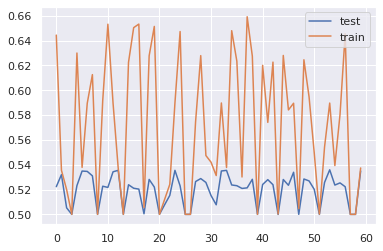

In [9]:
test_scores = grid.cv_results_['mean_test_ba']
train_scores = grid.cv_results_['mean_train_ba'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [10]:
pd.DataFrame(X_train.iloc[20, :])

12810
SEXO                0
EDAD               72
EMBARAZO            0
DIABETES            0
EPOC                0
ASMA                0
INMUSUPR            0
HIPERTENSION        1
CARDIOVASCULAR      0
OBESIDAD            1
RENAL_CRONICA       0
TABAQUISMO          0

In [11]:
y_train.iloc[20]

1

In [12]:
print("best score from grid search: %f" % grid.best_estimator_.score(X_test, y_test))

print("model prediction: ", grid.predict(pd.DataFrame(X_train.iloc[20, :].values.reshape(1, -1), columns = X_train.columns)))

print("model prediction probability: ",grid.predict_proba(pd.DataFrame(X_train.iloc[20, :].values.reshape(1, -1), columns = X_train.columns)))

best score from grid search: 0.572091
model prediction:  [1]
model prediction probability:  [[0.45157285 0.54842715]]


In [13]:
grid.best_params_

{'clf__selected_model': ('brf',
  {'criterion': 'entropy',
   'max_depth': 45,
   'max_features': 'auto',
   'min_samples_leaf': 10,
   'min_samples_split': 3,
   'n_estimators': 155})}

In [ ]:
#%%Pipeline without gridsearchcv

In [14]:
num_transformer=Pipeline(steps=[
    ('scaler',MinMaxScaler())])

preprocessor=ColumnTransformer(
    remainder='passthrough',
    transformers=[('num',num_transformer,['EDAD'])])

model=Pipeline([
    ('preprocessor',preprocessor),
    ('brf', BalancedRandomForestClassifier())
    ])

In [15]:
params = grid.best_params_['clf__selected_model'][1]

In [16]:
params

{'criterion': 'entropy',
 'max_depth': 45,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'n_estimators': 155}

In [17]:
params['brf__criterion'] = params.pop('criterion')
params['brf__max_depth'] = params.pop('max_depth')
params['brf__max_features'] = params.pop('max_features')
params['brf__min_samples_leaf'] = params.pop('min_samples_leaf')
params['brf__min_samples_split'] = params.pop('min_samples_split')
params['brf__n_estimators'] = params.pop('n_estimators')

In [18]:
params

{'brf__criterion': 'entropy',
 'brf__max_depth': 45,
 'brf__max_features': 'auto',
 'brf__min_samples_leaf': 10,
 'brf__min_samples_split': 3,
 'brf__n_estimators': 155}

In [19]:
model.set_params(**params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['EDAD'])])),
                ('brf',
                 BalancedRandomForestClassifier(criterion='entropy',
                                                max_depth=45,
                                                min_samples_leaf=10,
                                                min_samples_split=3,
                                                n_estimators=155))])

In [20]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['EDAD'])])),
                ('brf',
                 BalancedRandomForestClassifier(criterion='entropy',
                                                max_depth=45,
                                                min_samples_leaf=10,
                                                min_samples_split=3,
                                                n_estimators=155))])

In [21]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49      2512
           1       0.60      0.56      0.58      3314

    accuracy                           0.54      5826
   macro avg       0.53      0.53      0.53      5826
weighted avg       0.54      0.54      0.54      5826



In [22]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5336614786141788

In [23]:
metrics.average_precision_score(y_test, y_pred)

0.5862422472997249

In [24]:
metrics.f1_score(y_test, y_pred)

0.5797598627787306

In [25]:
#%%se preprocesan los datos
X_train_scaled = pd.DataFrame(model.named_steps['preprocessor'].fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(model.named_steps['preprocessor'].fit_transform(X_test),columns = X_test.columns)

In [26]:
#cambia el orden de edad y sexo
X_train_scaled[['EDAD','SEXO']]=X_train_scaled[['SEXO','EDAD']]
X_test_scaled[['EDAD','SEXO']]=X_test_scaled[['SEXO','EDAD']]

In [27]:
X_test_scaled.iloc[20, :]

SEXO              1.000000
EDAD              0.524752
EMBARAZO          0.000000
DIABETES          0.000000
EPOC              0.000000
ASMA              0.000000
INMUSUPR          0.000000
HIPERTENSION      1.000000
CARDIOVASCULAR    0.000000
OBESIDAD          0.000000
RENAL_CRONICA     0.000000
TABAQUISMO        0.000000
Name: 20, dtype: float64

In [28]:
y_test.iloc[20]

1

In [31]:
model.named_steps['brf'].predict(X_test_scaled.iloc[20, :].values.reshape(1, -1))

array([0])

In [32]:
model.named_steps['brf'].predict_proba(X_test_scaled.iloc[20, :].values.reshape(1, -1))

array([[0.56694239, 0.43305761]])

In [ ]:
# use Kernel SHAP to explain test set predictions

In [33]:
import shap

In [34]:
num_features = len(X_test.columns)

In [35]:
num_features

12

In [42]:
explainer = shap.KernelExplainer(model = model.named_steps['brf'].predict_proba, data = X_train_scaled, link = 'logit')

shap_values = explainer.shap_values(X_test_scaled.iloc[20])

#shap_values = explainer.shap_values(X = X_test_scaled.iloc[20], nsamples = 30, l1_reg="num_features("+str(num_features)+")")

Using 23302 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.

KeyboardInterrupt



In [ ]:
#feature importance 